#### Collocate and cut imagery

In [61]:
with open('../env.txt') as f:
    ENVIRONMENT = f.readlines()[0][:-1]
print(f'running on environment: "{ENVIRONMENT}"')
assert ENVIRONMENT in ['blaze',
                       'colab',
                       'local',
                       'cpom']


running on environment: "cpom"


In [62]:
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

sys.path.append(os.path.expanduser('~/.snap/snap-python'))
import snappy
from snappy import ProductIO
from snappy import jpy
HashMap = snappy.jpy.get_type('java.util.HashMap')

sys.path.append('../')
import sis_toolbox as helper
import preprocessing.snap_toolbox as snap_toolbox

if ENVIRONMENT == 'cpom':
    PATH_DATA = '/home/cb/sis2/data/'
elif ENVIRONMENT == 'local':
    PATH_DATA = '/Users/christianboehm/projects/sis2/data/'


In [63]:

TILESIZE = 256


In [64]:
img_pairs_inventory = pd.read_csv(os.path.join(PATH_DATA, 'inventory/img_pairs.csv'), index_col='index')
img_pairs_inventory.head(15)

,s2,s2_date,s3,s3_date,delta,status,possible overlap
index,,,,,,,
0,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-26 17:49:11,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-27 17:25:38,0 days 23:36:27,no overlap,0.000000
1,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-26 17:49:11,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-27 15:47:39,0 days 21:58:28,tifs created,1.000000
2,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-26 17:49:11,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-27 15:44:39,0 days 21:55:28,tifs created,1.000000
3,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-26 17:49:11,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-26 17:51:49,0 days 00:02:38,no overlap,0.000000
4,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-26 17:49:11,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-26 16:13:50,0 days 01:35:21,tifs created,1.000000
5,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-26 17:49:11,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-26 16:10:50,0 days 01:38:21,tifs created,1.000000
6,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-26 17:49:11,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-25 18:18:00,0 days 23:31:11,no overlap,0.000000
7,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-28 17:38:59,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-29 16:36:16,0 days 22:57:17,no overlap,0.000000
8,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-28 17:38:59,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-29 16:33:16,0 days 22:54:17,tifs created,1.000000


In [65]:
PAIR_INDEX = 13

In [66]:
### DO ALL FOLLOWING ONLY IF STATUS = NEW
pd.isna(img_pairs_inventory['status'].iloc[PAIR_INDEX]) or img_pairs_inventory['status'].iloc[PAIR_INDEX] == 'new'


False

In [67]:
row = img_pairs_inventory.iloc[PAIR_INDEX]

S2_FILE = row['s2']
S3_FILE = row['s3']
print(row['s2'])
print(row['s3'])

/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_2/DATA/S2B_MSIL1C_20220428T173859_N0400_R098_T17XPA_20220428T205006.SAFE
/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_3/OLCI/2022/04/S3A_OL_1_EFR____20220428T152128_20220428T152428_20220429T200056_0179_084_339_1800_MAR_O_NT_002.SEN3


In [68]:
# def get_collocated_image(S2_FILE, S3_FILE):

# Reading raw images
s2_raw = ProductIO.readProduct(S2_FILE)
s3_raw = ProductIO.readProduct(S3_FILE)


In [69]:
overlap = snap_toolbox.check_overlap(s2_raw, s3_raw)
print(overlap)

img_pairs_inventory.loc[PAIR_INDEX, 'possible overlap'] = overlap

1.0


In [70]:
### Do all following only if overlap == 1.0

if overlap < 1:
    img_pairs_inventory.loc[PAIR_INDEX, 'status'] = 'no overlap'

In [71]:
img_pairs_inventory

,s2,s2_date,s3,s3_date,delta,status,possible overlap
index,,,,,,,
0,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-26 17:49:11,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-27 17:25:38,0 days 23:36:27,no overlap,0.0000
1,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-26 17:49:11,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-27 15:47:39,0 days 21:58:28,tifs created,1.0000
2,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-26 17:49:11,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-27 15:44:39,0 days 21:55:28,tifs created,1.0000
3,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-26 17:49:11,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-26 17:51:49,0 days 00:02:38,no overlap,0.0000
4,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-26 17:49:11,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-26 16:13:50,0 days 01:35:21,tifs created,1.0000
...,...,...,...,...,...,...,...
276,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-02 17:18:49,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-02 18:14:13,0 days 00:55:24,no overlap,0.0000
277,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-02 17:18:49,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-02 16:36:14,0 days 00:42:35,no overlap,0.0000
278,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-02 17:18:49,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...,2022-04-02 16:33:14,0 days 00:45:35,tifs created,1.0000


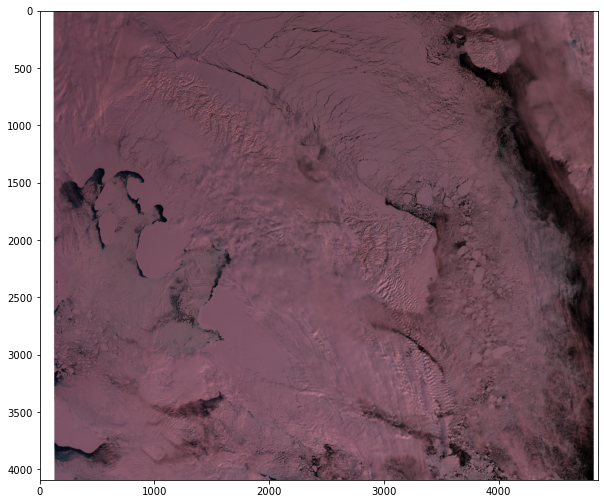

In [72]:
snap_toolbox.plot_s3_tile(s3_raw)

In [74]:
# s2_bands = snap_toolbox.band_subset(s2_raw, 'B2,B3,B4,B_opaque_clouds')
s2_bands = snap_toolbox.band_subset(s2_raw, 'B2,B3,B4')
# snap.plot_tile(s2_bands)


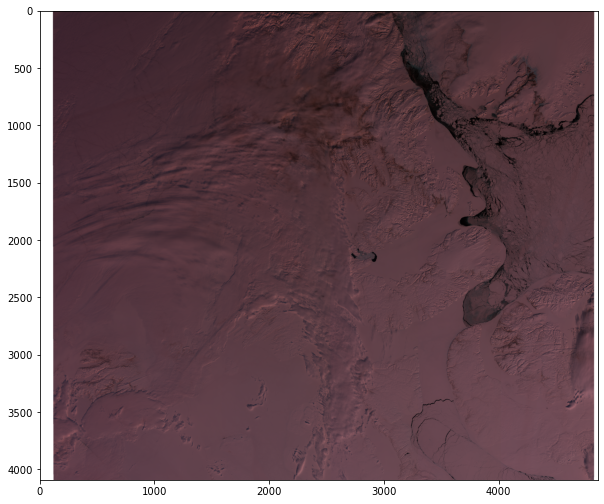

In [56]:

s3_bands = snap_toolbox.band_subset(s3_raw, 'Oa01_radiance,Oa02_radiance,Oa03_radiance,Oa04_radiance,Oa05_radiance,Oa06_radiance,Oa07_radiance,Oa08_radiance,Oa09_radiance,Oa10_radiance,Oa11_radiance,Oa12_radiance,Oa13_radiance,Oa14_radiance,Oa15_radiance,Oa16_radiance,Oa17_radiance,Oa18_radiance,Oa19_radiance,Oa20_radiance,Oa21_radiance')
# snap_toolbox.plot_s3_tile(s3_bands)


In [57]:
s2_bands = snap_toolbox.resample(s2_bands, 'B2')


In [75]:
def collocate(master, slave, resampling_method='NEAREST_NEIGHBOUR', rename=False):
    sources = HashMap()
    sources.put('master', master)
    sources.put('slave', slave)
    parameters = HashMap()
    parameters.put('masterProductName',master.getName())
    # parameters.put('targetProductName','_collocated')
    parameters.put('targetProductType','COLLOCATED')
    parameters.put('resamplingType',resampling_method)
    if rename:
        parameters.put('renameMasterComponents','true')
        parameters.put('renameSlaveComponents','true')
        parameters.put('masterComponentPattern','${ORIGINAL_NAME}_M')
        parameters.put('slaveComponentPattern','${ORIGINAL_NAME}_S${SLAVE_NUMBER_ID}')
    else:
        parameters.put('renameMasterComponents','false')
        parameters.put('renameSlaveComponents','false')
    result = snappy.GPF.createProduct('Collocate', parameters, sources)
    # print(f'Collocated, result has {len(list(result.getBandNames()))} bands')
    return result

In [77]:
collocated = collocate(s2_bands, s3_raw)


In [78]:
temp = snap_toolbox.region_subset(collocated, '2883,1056,256,256')

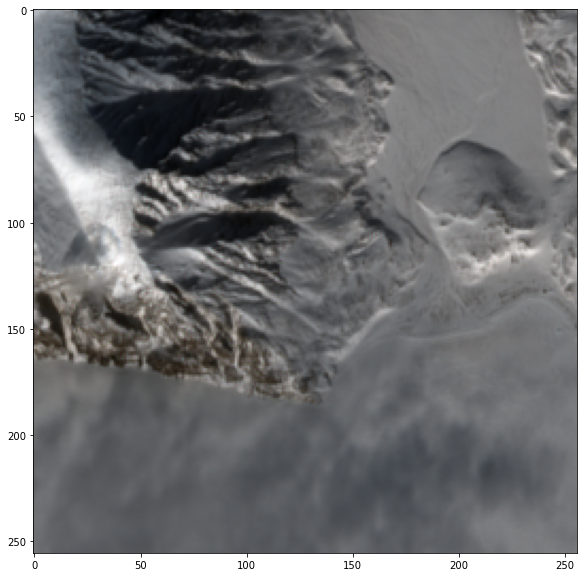

In [79]:
snap_toolbox.plot_tile(temp)

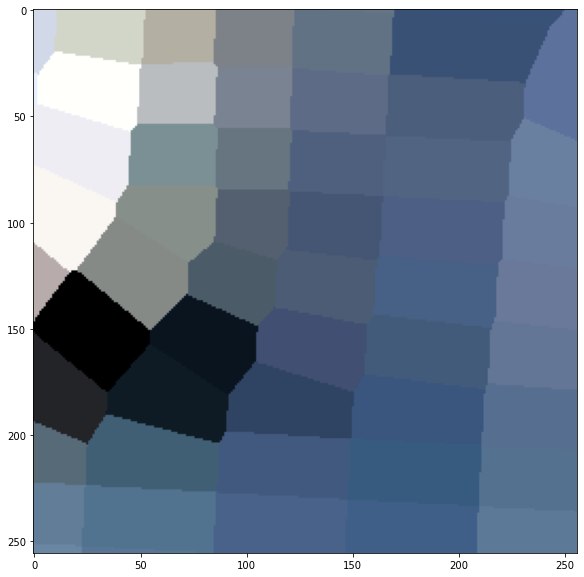

In [80]:
snap_toolbox.plot_s3_tile(temp)

[[72.97279799097045, -77.93922476372288], [72.8951551048872, -74.59826089036815], [71.91662516015066, -74.93510387280806], [71.98979020258201, -78.1012333530233]]
[[73.361128, -82.11411], [69.399633, -46.728386], [59.969502, -59.475508], [62.92364, -83.47278899999999]]
[[72.86326691744515, -77.08026094367243], [72.8617529691913, -77.00261047714622], [72.83885963400593, -77.00778833549319], [72.84037144124156, -77.08533885409466]]
Largest Rectangle Coordinates:
[(72.97279799097045, -77.93922476372288), [72.97279799097045, -74.93510387280806], (71.91662516015066, -74.93510387280806), [71.91662516015066, -77.93922476372288]]
(71.91662516015066, -78.1012333530233, 72.89517434961736, -74.72270419050324)


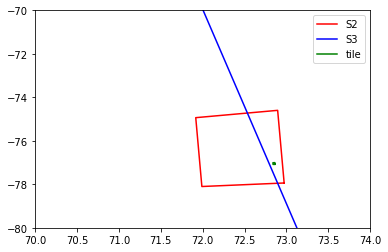

In [84]:
polygon_s2 = snap_toolbox.get_polygon(s2_raw)
polygon_s3 = snap_toolbox.get_polygon(s3_raw)
polygon_temp = snap_toolbox.get_polygon(temp)

fig, ax = plt.subplots()

# Plot the polygons
ax.plot(*polygon_s2.exterior.xy, color='red', label='S2')
ax.plot(*polygon_s3.exterior.xy, color='blue', label='S3')
ax.plot(*polygon_temp.exterior.xy, color='green', label='tile')
# ax.plot(*polygon_s2.intersection(polygon_s3).exterior.xy, color='black', label='joint')
# ax.plot(*polygon_s2.intersection(polygon_s3).envelope.exterior.xy, color='green', label='map')

# Set plot limits
ax.set_xlim(70, 74)
ax.set_ylim(-80, -70)

# Add legend
ax.legend()

# Show the plot
plt.show()

In [36]:
print(polygon_s2.intersection(polygon_s3).area / polygon_s2.area)
print(snap_toolbox.check_overlap(s2_raw, s3_raw))

0.7705852463402368
1.0


In [59]:
collocated = snap_toolbox.band_subset(collocated,'B2,B3,B4,Oa01_radiance,Oa02_radiance,Oa03_radiance,Oa04_radiance,Oa05_radiance,Oa06_radiance,Oa07_radiance,Oa08_radiance,Oa09_radiance,Oa10_radiance,Oa11_radiance,Oa12_radiance,Oa13_radiance,Oa14_radiance,Oa15_radiance,Oa16_radiance,Oa17_radiance,Oa18_radiance,Oa19_radiance,Oa20_radiance,Oa21_radiance,B_opaque_clouds,quality_flags,collocationFlags')


In [95]:
temp = snap_toolbox.region_subset(collocated, '1000,1000,960,960')

In [85]:
ProductIO.writeProduct(temp, '/home/cb/sis2/data/temp4.tif', 'GeoTIFF')

In [96]:
band = temp.getBand('Oa17_radiance')
# band = collocated.getBand('B2')
width = band.getRasterWidth()
height = band.getRasterHeight()
nparray = np.zeros(100*100, dtype=np.float32)
band.readPixels(0,0,100,100,nparray)

max_value = np.max(nparray)
count = np.count_nonzero(nparray == max_value)

print(max_value)
print(count / nparray.size)
    
min_value = np.min(nparray)
count = np.count_nonzero(nparray == min_value)

print(min_value)
print(count / nparray.size)

# nparray.shape = (height,width)

# snap.plot_s3_tile(collocated)


132.48495
0.0371
131.68137
0.0101


In [20]:

s2_raw.dispose()
s3_raw.dispose()
s2_bands.dispose()
s3_bands.dispose()


In [21]:
temp = snap_toolbox.region_subset(collocated, '0,0,200,200')

In [22]:
ProductIO.writeProduct(temp, '/home/cb/sis2/data/temp2.tif', 'GeoTIFF')

In [22]:
# tile_list, quality_list = snap.cut_tiles(collocated, TILESIZE, PAIR_INDEX, PATH_DATA)
# tile_inventory.head(50)
# tile_inventory[tile_inventory['status'] == 'ok']


In [26]:
img_pairs_inventory.loc[PAIR_INDEX, 'status'] = 'tifs created'


In [28]:
img_pairs_inventory.to_csv(os.path.join(PATH_DATA, 'inventory/img_pairs.csv'))

In [23]:
tile_list.keys()

dict_keys(['20x20', '20x1018', '20x2016', '20x3014', '1018x20', '1018x1018', '1018x2016', '2016x1018', '3014x20', '3014x1018', '4012x20'])

In [ ]:
file_inventory.at[PAIR_INDEX, f'status_{TILESIZE}'] = 'created'


In [110]:
tile_inventory.head(50)

,img_index,tile,size,status,comment,filename
0,00004,20x20,960,ok,,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...
1,00004,20x1018,960,ok,,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...
2,00004,20x2016,960,ok,,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...
3,00004,20x3014,960,ok,,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...
4,00004,20x4012,960,quality,cloud coverage: 76%,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...
5,00004,20x5010,960,quality,cloud coverage: 94%,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...
6,00004,20x6008,960,quality,cloud coverage: 93%,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...
7,00004,20x7006,960,quality,cloud coverage: 100%,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...
8,00004,20x8004,960,quality,black proportion: 33%,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...
9,00004,20x9002,960,quality,black proportion: 91%,/cpnet/projects/sikuttiaq/pond_inlet/Sentinel_...


In [41]:
# tile = tile_list[list(tile_list.keys())[15]]
tile = quality_list['20x4012']

In [18]:
import importlib
importlib.reload(snap_toolbox)


<module 'snap' from '/home/cb/sis2/preprocessing/snap.py'>

In [20]:
# Reading raw images
s2_raw = ProductIO.readProduct(S2_FILE)
s3_raw = ProductIO.readProduct(S3_FILE)


In [22]:
snap_toolbox.plot_s3_tile(collocated)


RuntimeError: java.lang.IllegalArgumentException: [sourceGeoCoding] is null